## __Algerian Forest Dataset__

#### - Nidhish Sonavale
#### - Linkedin: www.linkedin.com/in/nidhishsonavale
#### - Work Mail: sonavalenidhish14@gmail.com


Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attributes and 1 output attribute (Temperature)

The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

#### __Data Reading__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from streamlit.dataframe_util import fix_arrow_incompatible_column_types

%matplotlib inline

In [2]:
df = pd.read_csv('algerianForest.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
## This Dataset is divided into 2 parts of both region
## Therefore, we have to remove the separation rows and create a column indicating region
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [4]:
#Since only 2 rows have null values, we will drop both the values
df = df.dropna().reset_index(drop=True)

In [5]:
df.loc[[122]] #This row is not following the data,therefore drop it

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [6]:
df =df.drop(122).reset_index(drop=True)

In [7]:
#Checking For null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [9]:
## The columns in Dataset have uneven Spacing. Therefore, Stripping the unnecessary spaces
df.columns = df.columns.str.strip()

In [10]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [11]:
## Adding a Column "Region" to indicate both regions
# 0 -> Bejaia region
# 1 -> Sidi Bel-abbes region
df.loc[:121,"Region"] = 0
df.loc[122:,'Region'] = 1

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [13]:
## Statistical Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


In [14]:
## Observation -> All Values should be converted to int/float for Model Training
df['Region'] = df['Region'].astype(int)

In [15]:
#No need of Day, Month and Year. Therefore, drop those columns
df.drop(['day','month','year'],axis=1,inplace=True)

In [16]:
conversion_list = []
for col in df.columns:
    if df[col].dtypes == 'object':
        conversion_list.append(col)

In [17]:
for cols in conversion_list:
    if cols != "Classes":
        df[cols] = df[cols].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    float64
 1   RH           243 non-null    float64
 2   Ws           243 non-null    float64
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int32  
dtypes: float64(10), int32(1), object(1)
memory usage: 22.0+ KB


In [19]:
#Handling the "Classes" column
df['Classes'].unique()
#Observation -> There are various data of the same category which is segregated due to uneven spacing

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [20]:
# Binary Encoding the "Classes" column
# 0 -> Not fire
# 1 -> Fire
df['Classes'] = np.where(df['Classes'].str.startswith('not'),0,1)

In [21]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [22]:
# Observation -> Successfully Converted All Columns to int/float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    float64
 1   RH           243 non-null    float64
 2   Ws           243 non-null    float64
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int32  
dtypes: float64(10), int32(2)
memory usage: 21.0 KB


In [23]:
df.to_csv('algerianforest_cleaned.csv',index=False)

### __Splitting The Data for Model Training__

In [24]:
# Dependent Feature -> FWI
# Independent Feature -> Rest of Columns
X = df.drop('FWI',axis=1)
y = df['FWI']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### __Checking For Correlation and Multi collinearity__

In [26]:
X_train.shape,X_test.shape

((194, 11), (49, 11))

In [27]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.666832,-0.363524,-0.353372,0.684186,0.485272,0.344520,0.610784,0.447509,0.497727,0.316034
RH,-0.666832,1.000000,0.268542,0.252659,-0.639914,-0.400913,-0.206873,-0.700103,-0.340127,-0.431097,-0.442337
Ws,-0.363524,0.268542,1.000000,0.219551,-0.238520,-0.026332,0.057709,-0.025648,0.008292,-0.106459,-0.188898
Rain,-0.353372,0.252659,0.219551,1.000000,-0.588079,-0.300879,-0.306149,-0.351447,-0.310650,-0.377688,-0.076930
FFMC,0.684186,-0.639914,-0.238520,-0.588079,1.000000,0.610152,0.511148,0.736174,0.596990,0.765968,0.275874
DMC,0.485272,-0.400913,-0.026332,-0.300879,0.610152,1.000000,0.884202,0.673975,0.982542,0.592269,0.194039
DC,0.344520,-0.206873,0.057709,-0.306149,0.511148,0.884202,1.000000,0.489671,0.945585,0.513694,-0.060157
ISI,0.610784,-0.700103,-0.025648,-0.351447,0.736174,0.673975,0.489671,1.000000,0.632169,0.732387,0.313642
BUI,0.447509,-0.340127,0.008292,-0.310650,0.596990,0.982542,0.945585,0.632169,1.000000,0.593063,0.094501
Classes,0.497727,-0.431097,-0.106459,-0.377688,0.765968,0.592269,0.513694,0.732387,0.593063,1.000000,0.209882


In [28]:
def check_multi_collinearity(dataset,threshold):
    corr_col = set()
    col_matrix = dataset.corr()
    for i in range(len(col_matrix.columns)):
        for j in range(i):
            if abs(col_matrix.iloc[i, j]) > threshold:
                colname = col_matrix.columns[i]
                corr_col.add(colname)
    return corr_col

In [29]:
# Setting the Threshold i.e the Correlation percent to 0.85
col = check_multi_collinearity(X_train,0.85)

In [30]:
# Removing those columns
X_train.drop(col,axis=1,inplace=True)
X_test.drop(col,axis=1,inplace=True)

In [31]:
X_train.shape,X_test.shape

((194, 9), (49, 9))

### __Standardization__

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

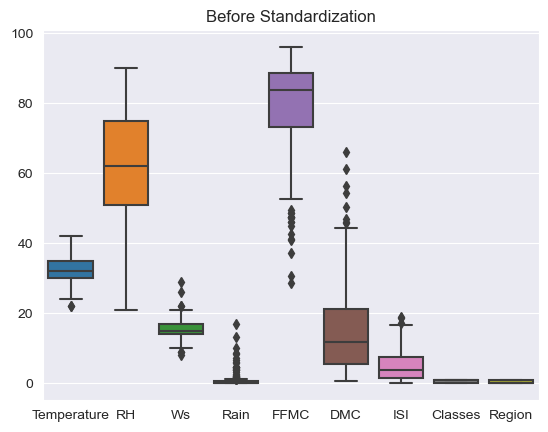

In [33]:
sns.boxplot(X_train)
plt.title('Before Standardization')
plt.show()

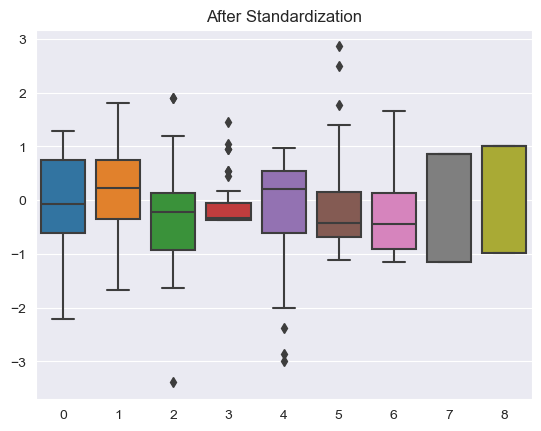

In [34]:
sns.boxplot(x_test_scaled)
plt.title("After Standardization")
plt.show()

### __Model Training Using Multi Linear Regression__

0.6700307048370672
97.73899683550064


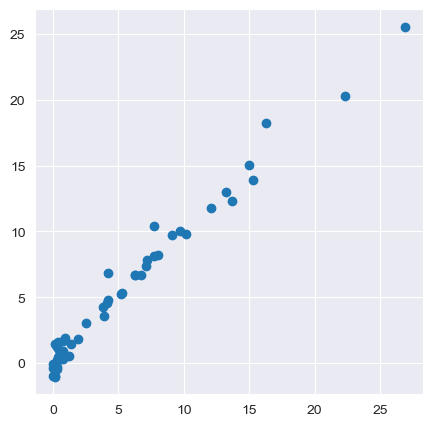

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


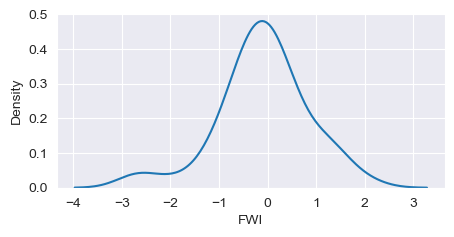

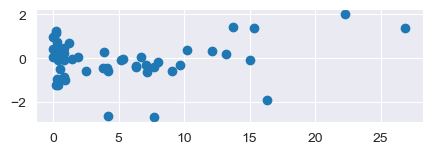

In [35]:
#Implementing Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
linreg = LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred_l = linreg.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred_l)
r2= r2_score(y_test,y_pred_l) * 100
print(mae)
print(r2)
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(y_test,y_pred_l)
plt.show()

residuals = y_test - y_pred_l
plt.figure(figsize=(5,5))
plt.subplot(2,1,2)
sns.kdeplot(residuals)
plt.show()

plt.figure(figsize=(5,5))
plt.subplot(3,1,3)
plt.scatter(y_test,residuals)


####Assumptions####
#Linear Graph -> Model is doing well


#Probably Overfitting due to high accuracy
#Using L1/L2 Regularization to fix overfitting


###  __Model Training using Ridge Regression / L2 Regularization__

0.6905345455834934
97.66228010748004


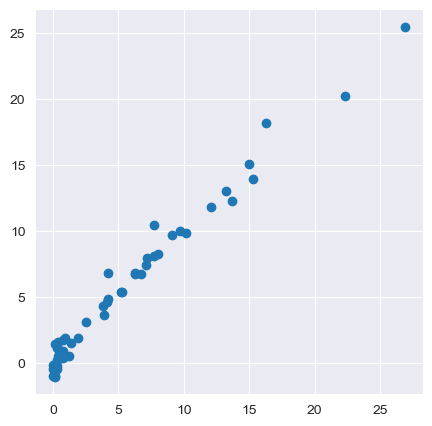

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


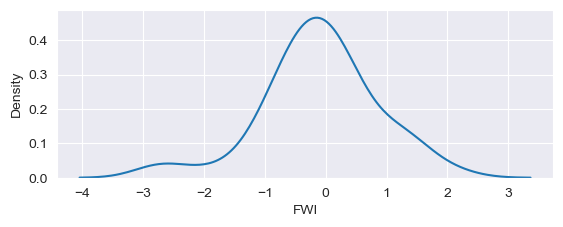

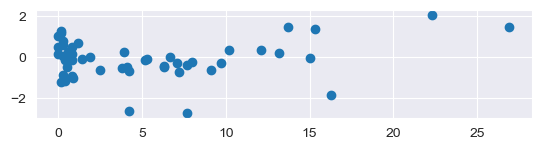

In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error
ridgereg = Ridge()
ridgereg.fit(x_train_scaled,y_train)
y_pred_r = ridgereg.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred_r)
r2= r2_score(y_test,y_pred_r) * 100
print(mae)
print(r2)

plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(y_test,y_pred_r)
plt.show()

residuals = y_test - y_pred_r
plt.subplot(2,1,2)
sns.kdeplot(residuals)
plt.show()

plt.subplot(3,1,3)
plt.scatter(y_test,residuals)


### __Ridge Regression Cross Validation__

0.8714379868451502
96.77330008807273


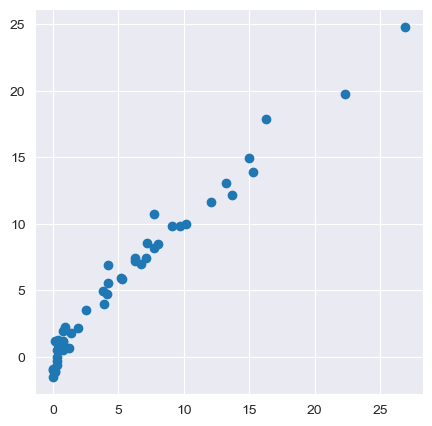

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


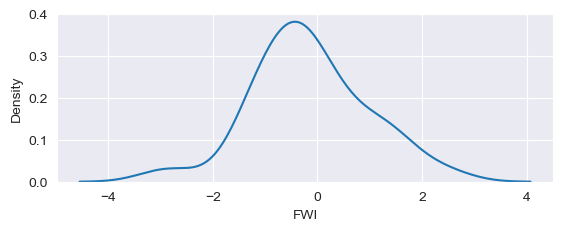

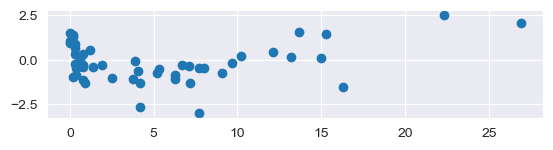

In [37]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_absolute_error
ridgecv = RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred_r_cv = ridgecv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred_r_cv)
r2= r2_score(y_test,y_pred_r_cv) * 100
print(mae)
print(r2)

plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(y_test,y_pred_r_cv)
plt.show()

residuals = y_test - y_pred_r_cv
plt.subplot(2,1,2)
sns.kdeplot(residuals)
plt.show()

plt.subplot(3,1,3)
plt.scatter(y_test,residuals)

### __Model Training Using Lasso Regression / L1 Regularization__

1.1144861330607514
94.33416904087942


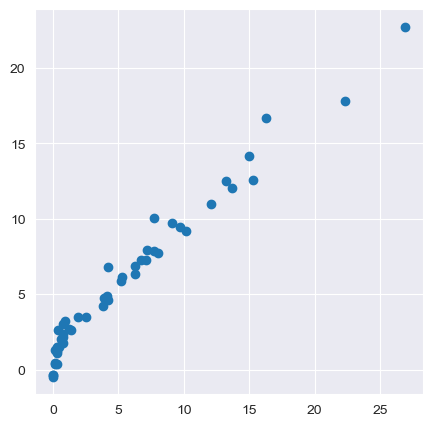

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


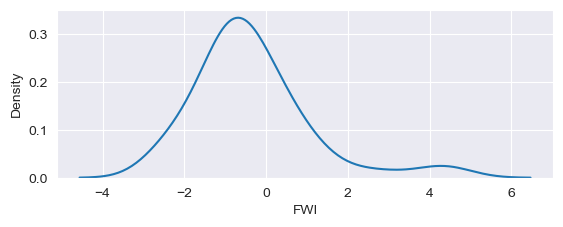

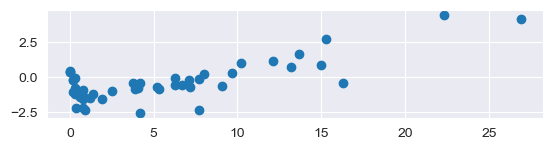

In [38]:
#Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error
lassoreg = Lasso()
lassoreg.fit(x_train_scaled,y_train)
y_pred_la = lassoreg.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred_la)
r2= r2_score(y_test,y_pred_la) * 100
print(mae)
print(r2)

plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(y_test,y_pred_la)
plt.show()

residuals = y_test - y_pred_la
plt.subplot(2,1,2)
sns.kdeplot(residuals)
plt.show()

plt.subplot(3,1,3)
plt.scatter(y_test,residuals)


### __Lasso Regression Cross Validation__


0.6596236862193228
97.74306736468266


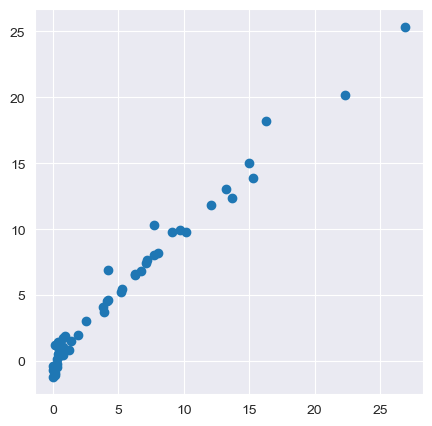

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


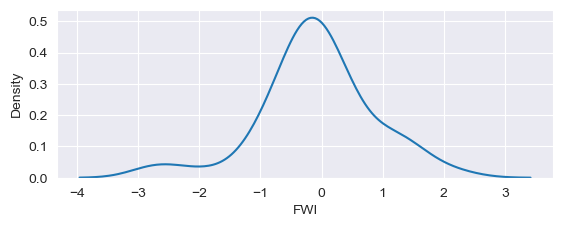

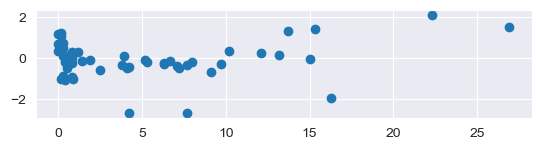

In [39]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score,mean_absolute_error
lassocv = LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)
y_pred_la_cv = lassocv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred_la_cv)
r2= r2_score(y_test,y_pred_la_cv) * 100
print(mae)
print(r2)

plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(y_test,y_pred_la_cv)
plt.show()

residuals = y_test - y_pred_la_cv
plt.subplot(2,1,2)
sns.kdeplot(residuals)
plt.show()

plt.subplot(3,1,3)
plt.scatter(y_test,residuals)

### __Model Training Using ELasticNet i.e L1 and L2 Regularization__

1.7415526320622194
87.77177823187074


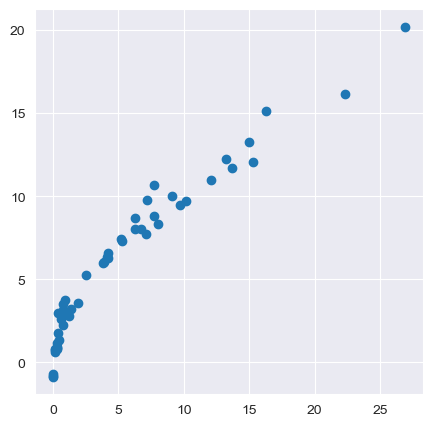

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


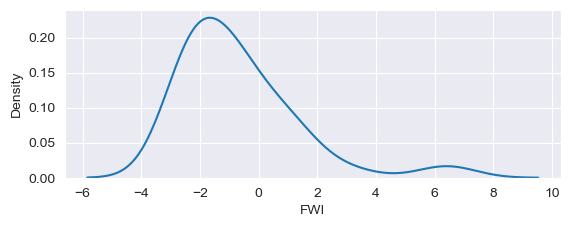

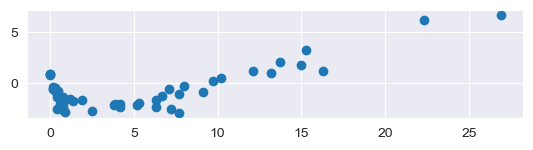

In [40]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error
elasticnet = ElasticNet()
elasticnet.fit(x_train_scaled,y_train)
y_pred_e = elasticnet.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred_e)
r2= r2_score(y_test,y_pred_e) * 100
print(mae)
print(r2)

plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(y_test,y_pred_e)
plt.show()

residuals = y_test - y_pred_e
plt.subplot(2,1,2)
sns.kdeplot(residuals)
plt.show()

plt.subplot(3,1,3)
plt.scatter(y_test,residuals)


### __ElasticNet Cross Validation__

0.7609068947918349
97.34769909970737


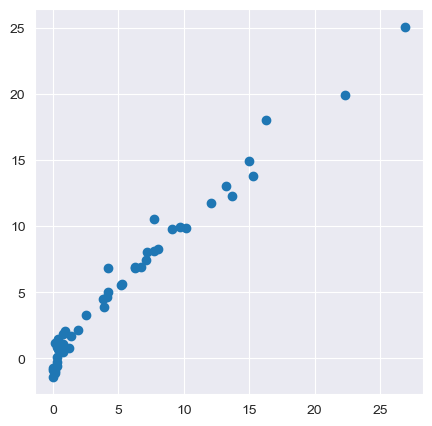

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


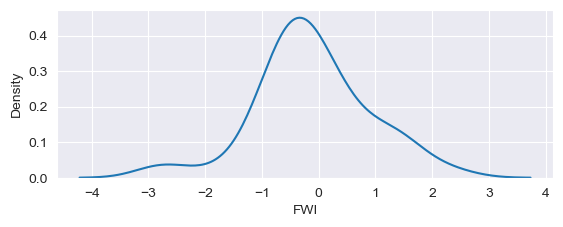

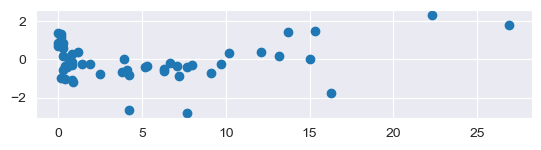

In [41]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score,mean_absolute_error
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(x_train_scaled,y_train)
y_pred_e_cv = elasticcv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred_e_cv)
r2= r2_score(y_test,y_pred_e_cv) * 100
print(mae)
print(r2)

plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(y_test,y_pred_e_cv)
plt.show()

residuals = y_test - y_pred_e_cv
plt.subplot(2,1,2)
sns.kdeplot(residuals)
plt.show()

plt.subplot(3,1,3)
plt.scatter(y_test,residuals)

### __Pickling the StandardScaler and Best Model file__

In [85]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridgereg,open('ridgereg.pkl','wb'))